In [1]:
import numpy as np
import pandas as pd
# from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
# import sklearn

In [2]:
import os

In [3]:
# submission.to_csv("baseline.csv", index = False)

---

In [4]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

train = train.drop(['index', 'country'],axis = 1)
test =test.drop(['index', 'country'],axis = 1)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
concat_features = train

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

train = concat_features



concat_features = test

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

test = concat_features


In [7]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(train[name], prefix = name)
    train = pd.concat([train, mergedata], axis=1)
    train = train.drop([name], axis = 1)

In [8]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(test[name], prefix = name)
    test = pd.concat([test, mergedata], axis=1)
    test = test.drop([name], axis = 1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 93 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q1             14959 non-null  float64
 1   Q2             14931 non-null  float64
 2   Q3             14950 non-null  float64
 3   Q4             14929 non-null  float64
 4   Q5             14962 non-null  float64
 5   Q6             14952 non-null  float64
 6   Q7             14924 non-null  float64
 7   Q8             14952 non-null  float64
 8   Q9             14944 non-null  float64
 9   Q10            14928 non-null  float64
 10  Q11            14941 non-null  float64
 11  Q12            14933 non-null  float64
 12  Q13            14960 non-null  float64
 13  Q14            14964 non-null  float64
 14  Q15            14955 non-null  float64
 15  Q16            14967 non-null  float64
 16  Q17            14963 non-null  float64
 17  Q18            14937 non-null  float64
 18  Q19   

<AxesSubplot: >

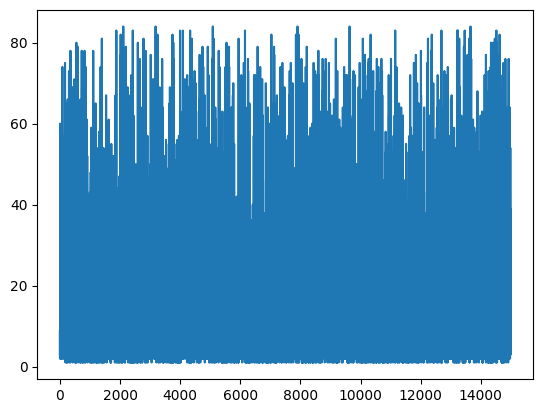

In [10]:
train.introelapse.plot()

In [11]:
train['Ex'] = train['TIPI1']-train['TIPI6']
train['Ag'] = train['TIPI7']-train['TIPI2']
train['Con'] = train['TIPI3']-train['TIPI8']
train['Es'] =train['TIPI9']-train['TIPI4']
train['Op'] =train['TIPI5']-train['TIPI10']

In [12]:
test['Ex'] = test['TIPI1']-test['TIPI6']
test['Ag'] = test['TIPI7']-test['TIPI2']
test['Con'] = test['TIPI3']-test['TIPI8']
test['Es'] =test['TIPI9']-test['TIPI4']
test['Op'] =test['TIPI5']-test['TIPI10']

In [13]:
train = train.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

test = test.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

In [14]:
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [15]:
train_x

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,voted_1.0,voted_2.0,married_1.0,married_2.0,married_3.0,Ex,Ag,Con,Es,Op
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,0,1,1,0,0,-1.0,2.0,2.0,4.0,0.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1,0,0,1,0,2.0,3.0,2.0,-3.0,1.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,0,1,0,0,1,-4.0,1.0,-1.0,4.0,3.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,0,1,1,0,0,0.0,1.0,-1.0,-1.0,2.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,0,1,1,0,0,-1.0,0.0,0.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,0,1,1,0,0,-3.0,1.0,1.0,0.0,0.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,1,0,0,1,0,0.0,2.0,3.0,-3.0,2.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1,0,1,0,0,-4.0,0.0,-1.0,-4.0,0.0
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,0,1,0,1,0,-4.0,4.0,-1.0,-3.0,3.0


---

In [16]:
# pip install pycaret

In [17]:
from pycaret.classification import *

In [18]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = train, target = 'nerdiness')

,Description,Value
0,session_id,5034
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 88)"
5,Missing Values,True
6,Numeric Features,37
7,Categorical Features,50
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
# best_3 = compare_models(sort = 'AUC', n_select = 3)

In [20]:
best_2 = compare_models(sort = 'AUC', n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7689,0.8553,0.8284,0.7701,0.7981,0.5288,0.5310,0.4360
rf,Random Forest Classifier,0.7655,0.8515,0.8252,0.7674,0.7951,0.5218,0.5240,0.2680
catboost,CatBoost Classifier,0.7544,0.8237,0.8132,0.7587,0.7849,0.4994,0.5013,2.1760
xgboost,Extreme Gradient Boosting,0.7487,0.8161,0.7941,0.7609,0.7770,0.4895,0.4902,2.0620
lightgbm,Light Gradient Boosting Machine,0.7465,0.8159,0.8056,0.7524,0.7780,0.4835,0.4853,0.1120
gbc,Gradient Boosting Classifier,0.7253,0.7968,0.7884,0.7335,0.7599,0.4400,0.4417,1.2470
lr,Logistic Regression,0.7266,0.7930,0.7859,0.7362,0.7602,0.4431,0.4446,3.3690
lda,Linear Discriminant Analysis,0.7236,0.7912,0.7870,0.7320,0.7584,0.4364,0.4381,0.4440
ada,Ada Boost Classifier,0.7170,0.7867,0.7757,0.7287,0.7514,0.4237,0.4250,0.2070
nb,Naive Bayes,0.6785,0.7362,0.7733,0.6845,0.7261,0.3405,0.3444,0.0270


In [21]:
best_2 = compare_models(sort = 'Accuracy', n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7689,0.8553,0.8284,0.7701,0.7981,0.5288,0.5310,0.3430
rf,Random Forest Classifier,0.7655,0.8515,0.8252,0.7674,0.7951,0.5218,0.5240,0.2910
catboost,CatBoost Classifier,0.7544,0.8237,0.8132,0.7587,0.7849,0.4994,0.5013,1.7770
xgboost,Extreme Gradient Boosting,0.7487,0.8161,0.7941,0.7609,0.7770,0.4895,0.4902,1.4120
lightgbm,Light Gradient Boosting Machine,0.7465,0.8159,0.8056,0.7524,0.7780,0.4835,0.4853,0.0750
lr,Logistic Regression,0.7266,0.7930,0.7859,0.7362,0.7602,0.4431,0.4446,1.9250
gbc,Gradient Boosting Classifier,0.7253,0.7968,0.7884,0.7335,0.7599,0.4400,0.4417,1.1330
ridge,Ridge Classifier,0.7243,0.0000,0.7880,0.7324,0.7591,0.4377,0.4394,0.0340
lda,Linear Discriminant Analysis,0.7236,0.7912,0.7870,0.7320,0.7584,0.4364,0.4381,0.2920
ada,Ada Boost Classifier,0.7170,0.7867,0.7757,0.7287,0.7514,0.4237,0.4250,0.2890


In [22]:
# best_1 = compare_models(sort = 'AUC', n_select = 1)

In [23]:
blended = blend_models(estimator_list = best_2, fold = 4, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7585,0.8463,0.8217,0.7597,0.7895,0.5072,0.5094
1,0.7512,0.8347,0.8079,0.7571,0.7817,0.4933,0.4947
2,0.7505,0.8336,0.8238,0.7487,0.7845,0.4898,0.4930
3,0.7694,0.8542,0.8383,0.7658,0.8004,0.5288,0.5319
Mean,0.7574,0.8422,0.8229,0.7578,0.7890,0.5048,0.5072
Std,0.0076,0.0085,0.0108,0.0061,0.0071,0.0153,0.0156


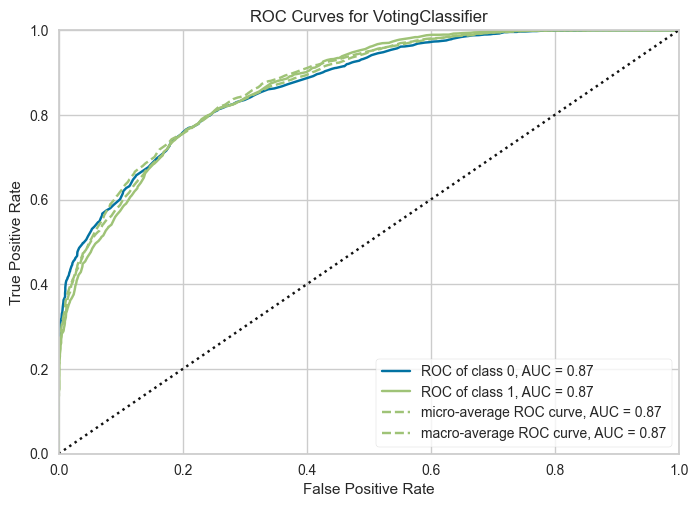

In [37]:
plot_model(blended)

In [24]:
# blended = blend_models(estimator_list = best_1, fold = 5, method = 'soft')

In [25]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7776,0.8703,0.8453,0.7765,0.8094,0.5436,0.5464


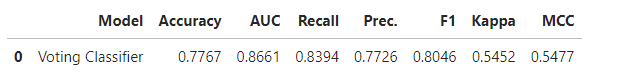

In [26]:
final_model = finalize_model(blended)

In [27]:
predictions = predict_model(final_model, data = test)

In [28]:
predictions['Score']

0        0.880
1        0.790
2        0.760
3        0.595
4        0.945
         ...  
35447    0.910
35448    0.815
35449    0.965
35450    0.920
35451    0.695
Name: Score, Length: 35452, dtype: float64

In [29]:
predictions['Label']

0        0
1        1
2        1
3        1
4        1
        ..
35447    1
35448    1
35449    1
35450    0
35451    1
Name: Label, Length: 35452, dtype: int32

In [30]:
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']

In [31]:
predictions['Score']

0        0.120
1        0.790
2        0.760
3        0.595
4        0.945
         ...  
35447    0.910
35448    0.815
35449    0.965
35450    0.080
35451    0.695
Name: Score, Length: 35452, dtype: float64

In [32]:
sub = predictions['Score']

In [33]:
sub

0        0.120
1        0.790
2        0.760
3        0.595
4        0.945
         ...  
35447    0.910
35448    0.815
35449    0.965
35450    0.080
35451    0.695
Name: Score, Length: 35452, dtype: float64

In [34]:
submission = pd.read_csv('./data/sample_submission.csv')

submission['nerdiness'] = sub

In [35]:
submission

,index,nerdiness
0,0,0.120
1,1,0.790
2,2,0.760
3,3,0.595
4,4,0.945
...,...,...
35447,35447,0.910
35448,35448,0.815
35449,35449,0.965
35450,35450,0.080


In [36]:
submission.to_csv("./submit/submit1.csv", index = False)